Importing dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import plotly.express as px
from scipy import signal

Loading the csv file 

Using parse_dates for converting date object into datetime

Using index_col for setting datetime as index 

In [4]:
df = pd.read_csv('temperature.csv',parse_dates=['datetime'],index_col="datetime")
df.round(2)

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.10,NaN,NaN,NaN
2012-10-01 13:00:00,284.63,282.08,289.48,281.80,291.87,291.53,293.41,296.60,285.12,284.61,...,285.63,288.22,285.83,287.17,307.59,305.47,310.58,304.4,304.4,303.5
2012-10-01 14:00:00,284.63,282.08,289.47,281.80,291.87,291.53,293.40,296.61,285.15,284.61,...,285.66,288.25,285.83,287.19,307.59,304.31,310.50,304.4,304.4,303.5
2012-10-01 15:00:00,284.63,282.09,289.46,281.79,291.86,291.54,293.39,296.63,285.23,284.60,...,285.76,288.33,285.85,287.23,307.39,304.28,310.41,304.4,304.4,303.5
2012-10-01 16:00:00,284.62,282.10,289.45,281.78,291.86,291.55,293.38,296.65,285.31,284.59,...,285.85,288.41,285.86,287.28,307.15,304.24,310.33,304.4,304.4,303.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-29 20:00:00,NaN,282.00,NaN,280.82,293.55,292.15,289.54,294.71,285.72,289.56,...,290.24,NaN,275.13,288.08,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,282.89,NaN,281.65,295.68,292.74,290.61,295.59,286.45,290.70,...,289.24,NaN,274.13,286.02,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,283.39,NaN,282.75,295.96,292.58,291.34,296.25,286.44,289.71,...,286.78,NaN,273.48,283.94,NaN,NaN,NaN,NaN,NaN,NaN


Checking the index 

In [5]:
df.index

DatetimeIndex(['2012-10-01 12:00:00', '2012-10-01 13:00:00',
               '2012-10-01 14:00:00', '2012-10-01 15:00:00',
               '2012-10-01 16:00:00', '2012-10-01 17:00:00',
               '2012-10-01 18:00:00', '2012-10-01 19:00:00',
               '2012-10-01 20:00:00', '2012-10-01 21:00:00',
               ...
               '2017-11-29 15:00:00', '2017-11-29 16:00:00',
               '2017-11-29 17:00:00', '2017-11-29 18:00:00',
               '2017-11-29 19:00:00', '2017-11-29 20:00:00',
               '2017-11-29 21:00:00', '2017-11-29 22:00:00',
               '2017-11-29 23:00:00', '2017-11-30 00:00:00'],
              dtype='datetime64[ns]', name='datetime', length=45253, freq=None)

## 1) Write a function that efficiently converts every column to a different temperature scale

### Converting the temperature from Kelvin to Celsius using the below function

In [10]:
def myfunc(kelvin):
    celsius=(kelvin-273)
    return celsius 

In [11]:
df.loc[: , 'Vancouver' :'Jerusalem'].apply(myfunc,axis=0).round(2)


,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,36.10,NaN,NaN,NaN
2012-10-01 13:00:00,11.63,9.08,16.48,8.80,18.87,18.53,20.41,23.60,12.12,11.61,...,12.63,15.22,12.83,14.17,34.59,32.47,37.58,31.4,31.4,30.5
2012-10-01 14:00:00,11.63,9.08,16.47,8.80,18.87,18.53,20.40,23.61,12.15,11.61,...,12.66,15.25,12.83,14.19,34.59,31.31,37.50,31.4,31.4,30.5
2012-10-01 15:00:00,11.63,9.09,16.46,8.79,18.86,18.54,20.39,23.63,12.23,11.60,...,12.76,15.33,12.85,14.23,34.39,31.28,37.41,31.4,31.4,30.5
2012-10-01 16:00:00,11.62,9.10,16.45,8.78,18.86,18.55,20.38,23.65,12.31,11.59,...,12.85,15.41,12.86,14.28,34.15,31.24,37.33,31.4,31.4,30.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-29 20:00:00,NaN,9.00,NaN,7.82,20.55,19.15,16.54,21.71,12.72,16.56,...,17.24,NaN,2.13,15.08,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,9.89,NaN,8.65,22.68,19.74,17.61,22.59,13.45,17.70,...,16.24,NaN,1.13,13.02,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,10.39,NaN,9.75,22.96,19.58,18.34,23.25,13.44,16.71,...,13.78,NaN,0.48,10.94,NaN,NaN,NaN,NaN,NaN,NaN


### Converting the temperature from Kelvin to Fahrenheit using the below function


In [12]:
def myfunc(kelvin):

    f1=(kelvin-273) + 32
    fahr = f1*1.8 
    return fahr

In [13]:
df.loc[: , 'Vancouver' :'Jerusalem'].apply(myfunc,axis=0).round(2)

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,122.58,NaN,NaN,NaN
2012-10-01 13:00:00,78.53,73.94,87.26,73.44,91.57,90.95,94.34,100.08,79.42,78.50,...,80.33,85.00,80.69,83.11,119.86,116.05,125.24,114.12,114.12,112.5
2012-10-01 14:00:00,78.53,73.95,87.25,73.43,91.56,90.96,94.33,100.10,79.48,78.49,...,80.39,85.05,80.70,83.13,119.86,113.96,125.09,114.12,114.12,112.5
2012-10-01 15:00:00,78.53,73.97,87.23,73.42,91.55,90.98,94.31,100.14,79.62,78.48,...,80.56,85.19,80.73,83.22,119.50,113.91,124.94,114.12,114.12,112.5
2012-10-01 16:00:00,78.52,73.98,87.20,73.41,91.54,91.00,94.29,100.18,79.76,78.47,...,80.73,85.33,80.75,83.30,119.06,113.83,124.79,114.12,114.12,112.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-29 20:00:00,NaN,73.80,NaN,71.68,94.59,92.07,87.37,96.68,80.50,87.41,...,88.63,NaN,61.43,84.74,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,75.40,NaN,73.17,98.42,93.13,89.30,98.26,81.81,89.46,...,86.83,NaN,59.63,81.04,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,76.30,NaN,75.15,98.93,92.84,90.61,99.45,81.79,87.68,...,82.40,NaN,58.46,77.29,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Write a function that efficiently fills in missing values in every column, except for trailing NANs.¶

In [101]:
def num_missing(x):
      return sum(x.isnull())

df.apply(num_missing, axis=0)

datetime                0
Vancouver             795
Portland                1
San Francisco         793
Seattle                 3
Los Angeles             3
San Diego               1
Las Vegas               1
Phoenix                 3
Albuquerque             1
Denver                  1
San Antonio             1
Dallas                  4
Houston                 3
Kansas City             1
Minneapolis            13
Saint Louis             1
Chicago                 3
Nashville               2
Indianapolis            7
Atlanta                 6
Detroit                 1
Jacksonville            1
Charlotte               3
Miami                 805
Pittsburgh              3
Toronto                 1
Philadelphia            3
New York              793
Montreal                3
Boston                  3
Beersheba             798
Tel Aviv District     793
Eilat                 792
Haifa                 798
Nahariyya             797
Jerusalem             793
month                   0
season      

In [22]:
def impute_interpolate(df):
    return df.interpolate(method ='linear', limit_direction ='forward')

In [23]:
df.loc[: , 'Vancouver' :'Jerusalem'].apply(impute_interpolate,axis=0).round(2)

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.10,NaN,NaN,NaN
2012-10-01 13:00:00,284.63,282.08,289.48,281.80,291.87,291.53,293.41,296.60,285.12,284.61,...,285.63,288.22,285.83,287.17,307.59,305.47,310.58,304.40,304.40,303.50
2012-10-01 14:00:00,284.63,282.08,289.47,281.80,291.87,291.53,293.40,296.61,285.15,284.61,...,285.66,288.25,285.83,287.19,307.59,304.31,310.50,304.40,304.40,303.50
2012-10-01 15:00:00,284.63,282.09,289.46,281.79,291.86,291.54,293.39,296.63,285.23,284.60,...,285.76,288.33,285.85,287.23,307.39,304.28,310.41,304.40,304.40,303.50
2012-10-01 16:00:00,284.62,282.10,289.45,281.78,291.86,291.55,293.38,296.65,285.31,284.59,...,285.85,288.41,285.86,287.28,307.15,304.24,310.33,304.40,304.40,303.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-29 20:00:00,288.01,282.00,302.07,280.82,293.55,292.15,289.54,294.71,285.72,289.56,...,290.24,284.98,275.13,288.08,285.94,294.15,291.02,299.37,299.37,294.15
2017-11-29 21:00:00,288.01,282.89,302.07,281.65,295.68,292.74,290.61,295.59,286.45,290.70,...,289.24,284.98,274.13,286.02,285.94,294.15,291.02,299.37,299.37,294.15
2017-11-29 22:00:00,288.01,283.39,302.07,282.75,295.96,292.58,291.34,296.25,286.44,289.71,...,286.78,284.98,273.48,283.94,285.94,294.15,291.02,299.37,299.37,294.15


If limit=2 means max number of nans it can fill.

As per the question,  if there's temperature data on either side of a timestamp, it should interpolate through it. 
But if data stopped being collected, function should leave nans at the end.
Same thing can be observed in the output where limit =2 is specified and in case where it is not specified it's filling values for the trailing nan's as well. 

In [24]:
def impute_interpolate(df):
    return df.interpolate(method ='linear', limit_direction ='forward',limit=2)

In [25]:
df.loc[: , 'Vancouver' :'Jerusalem'].apply(impute_interpolate,axis=0).round(2)

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.10,NaN,NaN,NaN
2012-10-01 13:00:00,284.63,282.08,289.48,281.80,291.87,291.53,293.41,296.60,285.12,284.61,...,285.63,288.22,285.83,287.17,307.59,305.47,310.58,304.4,304.4,303.5
2012-10-01 14:00:00,284.63,282.08,289.47,281.80,291.87,291.53,293.40,296.61,285.15,284.61,...,285.66,288.25,285.83,287.19,307.59,304.31,310.50,304.4,304.4,303.5
2012-10-01 15:00:00,284.63,282.09,289.46,281.79,291.86,291.54,293.39,296.63,285.23,284.60,...,285.76,288.33,285.85,287.23,307.39,304.28,310.41,304.4,304.4,303.5
2012-10-01 16:00:00,284.62,282.10,289.45,281.78,291.86,291.55,293.38,296.65,285.31,284.59,...,285.85,288.41,285.86,287.28,307.15,304.24,310.33,304.4,304.4,303.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-29 20:00:00,NaN,282.00,NaN,280.82,293.55,292.15,289.54,294.71,285.72,289.56,...,290.24,NaN,275.13,288.08,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,282.89,NaN,281.65,295.68,292.74,290.61,295.59,286.45,290.70,...,289.24,NaN,274.13,286.02,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,283.39,NaN,282.75,295.96,292.58,291.34,296.25,286.44,289.71,...,286.78,NaN,273.48,283.94,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Find cities A and B where city A is warmer than city B in the summer, but also colder than city B in the winter, on average

In [35]:
df = pd.read_csv('temperature.csv',parse_dates=['datetime'])
df

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,282.000000,NaN,280.820000,293.550000,292.150000,289.540000,294.710000,285.720000,...,290.240000,NaN,275.130000,288.080000,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,282.890000,NaN,281.650000,295.680000,292.740000,290.610000,295.590000,286.450000,...,289.240000,NaN,274.130000,286.020000,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,283.390000,NaN,282.750000,295.960000,292.580000,291.340000,296.250000,286.440000,...,286.780000,NaN,273.480000,283.940000,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,283.020000,NaN,282.960000,295.650000,292.610000,292.150000,297.150000,286.140000,...,284.570000,NaN,272.480000,282.170000,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df.index

RangeIndex(start=0, stop=45253, step=1)

## Creating a month column in original dataframe

In [40]:
df['month'] = df['datetime'].dt.month
df

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,month
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN,10
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5,10
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5,10
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5,10
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,282.000000,NaN,280.820000,293.550000,292.150000,289.540000,294.710000,285.720000,...,NaN,275.130000,288.080000,NaN,NaN,NaN,NaN,NaN,NaN,11
45249,2017-11-29 21:00:00,NaN,282.890000,NaN,281.650000,295.680000,292.740000,290.610000,295.590000,286.450000,...,NaN,274.130000,286.020000,NaN,NaN,NaN,NaN,NaN,NaN,11
45250,2017-11-29 22:00:00,NaN,283.390000,NaN,282.750000,295.960000,292.580000,291.340000,296.250000,286.440000,...,NaN,273.480000,283.940000,NaN,NaN,NaN,NaN,NaN,NaN,11
45251,2017-11-29 23:00:00,NaN,283.020000,NaN,282.960000,295.650000,292.610000,292.150000,297.150000,286.140000,...,NaN,272.480000,282.170000,NaN,NaN,NaN,NaN,NaN,NaN,11


In [39]:
df.loc[: , 'Vancouver' : 'month']

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN,10
1,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,...,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5,10
2,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,284.607306,...,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5,10
3,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,...,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5,10
4,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,...,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,NaN,282.000000,NaN,280.820000,293.550000,292.150000,289.540000,294.710000,285.720000,289.560000,...,NaN,275.130000,288.080000,NaN,NaN,NaN,NaN,NaN,NaN,11
45249,NaN,282.890000,NaN,281.650000,295.680000,292.740000,290.610000,295.590000,286.450000,290.700000,...,NaN,274.130000,286.020000,NaN,NaN,NaN,NaN,NaN,NaN,11
45250,NaN,283.390000,NaN,282.750000,295.960000,292.580000,291.340000,296.250000,286.440000,289.710000,...,NaN,273.480000,283.940000,NaN,NaN,NaN,NaN,NaN,NaN,11
45251,NaN,283.020000,NaN,282.960000,295.650000,292.610000,292.150000,297.150000,286.140000,289.170000,...,NaN,272.480000,282.170000,NaN,NaN,NaN,NaN,NaN,NaN,11


### Binning our data 

In [45]:
#define bins :
bins = [1,3,6,9,12]
# define labels 
label = ['Winter','Spring','Summer','Fall']


df['season']= pd.cut(df['month'],bins,labels=label)
df

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,month,season
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN,10,Fall
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5,10,Fall
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5,10,Fall
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5,10,Fall
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5,10,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,282.000000,NaN,280.820000,293.550000,292.150000,289.540000,294.710000,285.720000,...,275.130000,288.080000,NaN,NaN,NaN,NaN,NaN,NaN,11,Fall
45249,2017-11-29 21:00:00,NaN,282.890000,NaN,281.650000,295.680000,292.740000,290.610000,295.590000,286.450000,...,274.130000,286.020000,NaN,NaN,NaN,NaN,NaN,NaN,11,Fall
45250,2017-11-29 22:00:00,NaN,283.390000,NaN,282.750000,295.960000,292.580000,291.340000,296.250000,286.440000,...,273.480000,283.940000,NaN,NaN,NaN,NaN,NaN,NaN,11,Fall
45251,2017-11-29 23:00:00,NaN,283.020000,NaN,282.960000,295.650000,292.610000,292.150000,297.150000,286.140000,...,272.480000,282.170000,NaN,NaN,NaN,NaN,NaN,NaN,11,Fall


Grouping the data on binned column 

In [46]:
season_grouped= df.groupby('season')
season_grouped.mean().head(5)

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,month
season,,,,,,,,,,,,,,,,,,,,,
Winter,279.098436,280.488674,285.743668,280.141370,287.729062,287.374702,286.394675,289.703556,280.248929,276.129105,...,274.769547,267.422092,273.533094,285.997928,288.764377,289.756519,289.844979,288.888222,288.002132,2.523649
Spring,286.358575,287.349380,289.150545,286.675304,291.541748,290.551596,297.196965,299.562485,290.556664,286.384279,...,289.470167,285.945235,287.167470,294.139985,295.859405,299.434681,296.161008,294.873178,295.186076,5.000000
Summer,290.963652,292.491610,292.251205,291.098120,296.235125,295.002449,303.086515,304.980927,294.176589,293.036009,...,295.860273,292.492045,294.163882,297.931514,301.218304,304.504255,301.859518,300.223254,299.895695,7.989130
Fall,280.030428,281.320055,286.318067,280.970780,288.817639,288.722986,285.855432,290.195208,280.263513,277.662198,...,282.248654,276.431908,280.963255,289.145649,293.031396,293.598688,293.846474,293.135221,290.811131,10.941294


Picking our two cities 

In [48]:
LV = season_grouped['Las Vegas'].mean()
LV


season
Winter    286.394675
Spring    297.196965
Summer    303.086515
Fall      285.855432
Name: Las Vegas, dtype: float64

In [49]:
LA = season_grouped['Los Angeles'].mean()
LA

season
Winter    287.729062
Spring    291.541748
Summer    296.235125
Fall      288.817639
Name: Los Angeles, dtype: float64

Joining the two dataframes 

In [50]:
Final = pd.concat([LV, LA],axis='columns')
Final

,Las Vegas,Los Angeles
season,,
Winter,286.394675,287.729062
Spring,297.196965,291.541748
Summer,303.086515,296.235125
Fall,285.855432,288.817639


From the above calculations we can say that we have found two cities where city A = Las Vegas and city B = Los Angeles
By looking at the temperature calculationsit is clear that LV is warmer than LA in summer and LV is also colder than LA in winters.

## 4. For the two cities you found in for problem 4 (there are many possible answers), clean up the data via aggregation or rolling averages and plot a clear visual¶

Time Series Plot is used to observe various trends in the dataset over a period of time. In such problems, the data is ordered by time and can fluctuate by the unit of time considered in the dataset (day, month, seconds, hours, etc.). When plotting the time series data, these fluctuations may prevent us to clearly gain insights about the peaks and troughs in the plot. So to clearly get value from the data, we use the rolling average concept to make the time series plot.

The rolling average or moving average is the simple mean of the last ‘n’ values. It can help us in finding trends that would be otherwise hard to detect. Also, they can be used to determine long-term trends. You can simply calculate the rolling average by summing up the previous ‘n’ values and dividing them by ‘n’ itself. But for this, the first (n-1) values of the rolling average would be Nan.

In [70]:
df['date']=df['datetime'].dt.date
df
px.line(df.groupby('date').agg({'Las Vegas':'mean'}).reset_index(), x='date', y='Las Vegas')


In [72]:
px.line(df.groupby('date').agg({'Los Angeles':'mean'}).reset_index(), x='date', y='Los Angeles')

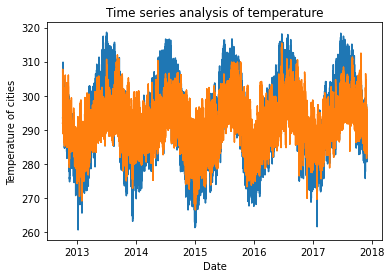

In [85]:
plt.plot(df['datetime'],df['Las Vegas'])
plt.plot(df['date'],df['Los Angeles'])
plt.title('Time series analysis of temperature')
plt.xlabel('Date')
plt.ylabel('Temperature of cities')
#plt.legend('This is Las Vegas and this is Los Angeles')
plt.show()

We can notice that it is very difficult to gain knowledge from the above plot as the data fluctuates a lot. So, let us plot it again but using the Rolling Average concept this time.

### Computing  Rolling Average using pandas.DataFrame.rolling.mean().

No handles with labels found to put in legend.


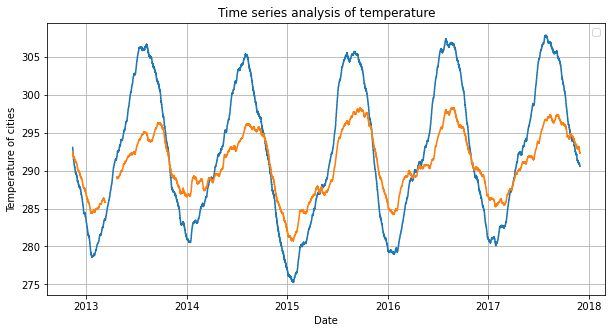

In [94]:
plt.figure(figsize=(10,5))
plt.plot(df['date'],df['Las Vegas'].rolling(1000).mean())
plt.plot(df['date'],df['Los Angeles'].rolling(1000).mean())
plt.grid(True)
plt.title('Time series analysis of temperature')
plt.xlabel('Date')
plt.ylabel('Temperature of cities')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show();

In [100]:
arr = [-1,2,-3,4,-5,6,-7,8,-9,10,-11,12]

rearrange_numbers =lambda arr: [x for x in arr if x >=0 ] + [x for x in arr if x < 0]
new_arr = rearrange_numbers(arr)
print(new_arr) 

[2, 4, 6, 8, 10, 12, -1, -3, -5, -7, -9, -11]
